In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://github.com/jagustinus/ml-class/raw/main/UTS/titanic/train.csv"
data = pd.read_csv(url)

print("Missing Values:")
print(data.isnull().sum())

imputer = SimpleImputer(strategy='most_frequent')

data['Age'] = imputer.fit_transform(data[['Age']])

data['Embarked'] = imputer.fit_transform(data[['Embarked']]).ravel()

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Data preprocessing completed.


In [20]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg_model.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")



Logistic Regression Performance:
Accuracy: 0.7989
Precision: 0.7794
Recall: 0.7162
F1-score: 0.7465


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("\nk-Nearest Neighbors Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")



k-Nearest Neighbors Performance:
Accuracy: 0.7989
Precision: 0.7714
Recall: 0.7297
F1-score: 0.7500


In [22]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSupport Vector Machine Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")



Support Vector Machine Performance:
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1-score: 0.7273


In [23]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'kNN', 'SVM'],
    'Accuracy': [accuracy_log_reg, accuracy_knn, accuracy_svm],
    'Precision': [precision_log_reg, precision_knn, precision_svm],
    'Recall': [recall_log_reg, recall_knn, recall_svm],
    'F1-score': [f1_log_reg, f1_knn, f1_svm]
})

print("\nModel Comparison:")
print(results)



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.798883   0.779412  0.716216  0.746479
1                  kNN  0.798883   0.771429  0.729730  0.750000
2                  SVM  0.782123   0.753623  0.702703  0.727273


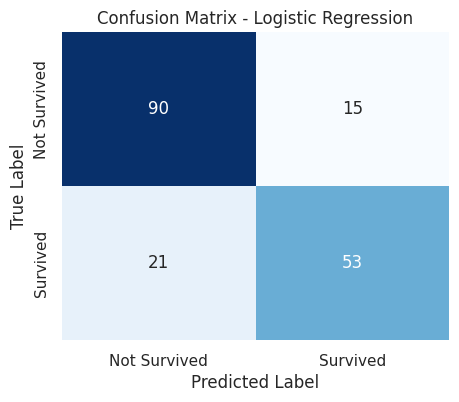

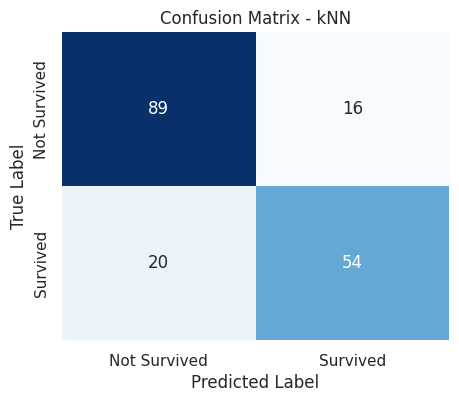

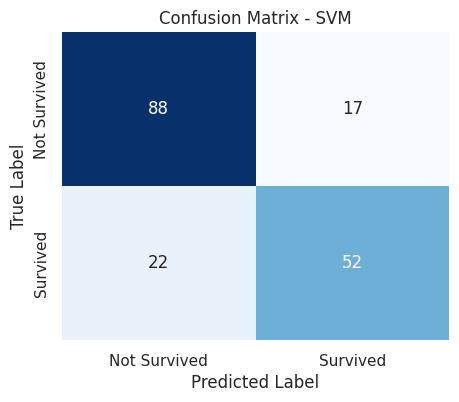

In [24]:
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(conf_matrix_log_reg, "Logistic Regression")
plot_confusion_matrix(conf_matrix_knn, "kNN")
plot_confusion_matrix(conf_matrix_svm, "SVM")
